In [8]:
# Code you have previously used to load data
import os
import re
import time
from operator import mod

import numpy as np
import pandas as pd
import scipy.interpolate
from matplotlib import pyplot as plt
from scipy import interpolate
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression

In [9]:
# variable="ArmAngle2"
# path = f"./{variable}"

# # find all sub folders under main directory
# sub_folders = [
#     name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))
# ]

# remove_list = [
#     ".git",
#     ".vscode",
#     "Archive",
#     "Model_template",
#     "Surface Model",
#     "__pycache__",
# ]
# sub_folders = [ele for ele in sub_folders if ele not in remove_list]

In [10]:
# print(sub_folders)

Setup Complete
pos:  4.1046000000000005


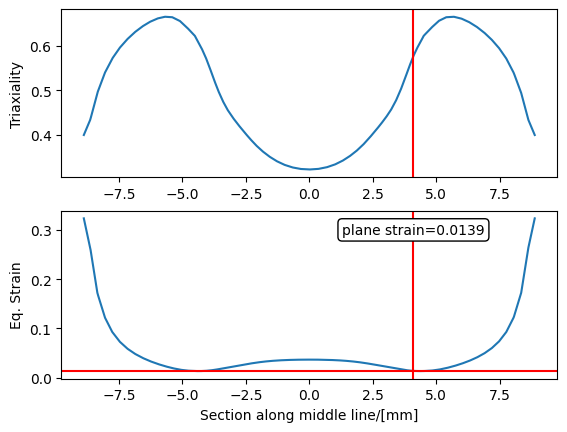

Strain:  0.013854611998189428


In [11]:
# for i in sub_folders:

# Path of the Tria to read

strain = 1 / np.sqrt(3)
# strain = 2 / 3

file = "Specimen_Shape_Investigation/no_notch/notch_6.9"


if strain == 1 / 3:
    strain_type = "uniaxial strain"
elif strain == 1 / np.sqrt(3):
    strain_type = "plane strain"
elif strain == 2 / 3:
    strain_type = "triaxial strain"


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


Tria_path = f"{file}/TriaxialityCurve.csv"


df_var = pd.read_csv(Tria_path, header=1)

column_headers_Tria = list(df_var.columns.values)


x_var = df_var[column_headers_Tria[0]]
# x = np.array(x_var).reshape(-1, 1)
x_var = x_var-0.5*x_var.max()
# print(x_var-0.5*x_var.max())



y_var = df_var[column_headers_Tria[1]]
# y = np.array(y_var)


# print(x)-*

print("Setup Complete")

f_tri = interpolate.interp1d(x_var, y_var, fill_value="extrapolate")
# plt.scatter(y_var, x_var)
# plt.plot(y_var,x_var)
# print(f(0.3333))


# y_lim_idx = y_var.argmax()
# x_lim = x_var[y_lim_idx]

# if x_lim > int(0.5 * x_var.max()):
#     x_lim = x_var.max() - x_lim

# x_lim = x_lim - 0.5

xnew = np.arange(0, int(x_var.max()) + 0.5, 0.0001)
# print("xnew: ", xnew)
ynew = f_tri(xnew)  # use interpolation function returned by `interp1d`

# print("x_lim: ", x_lim)
# plt.figure(figsize=(6, 9))

plt.subplot(2, 1, 1)
plt.plot(
    x_var,
    y_var,
    "-",
    #  xnew, ynew, "-"
)
# plt.show()

plt.ylabel("Triaxiality")
# plt.xlabel("Section along middle line/[mm]")


y_plane_strain = find_nearest(ynew, value=strain)


for i in np.arange(0, int(x_var.max()), 0.0001):
    if f_tri(i) == y_plane_strain:
        break

x_plane_strain = i
print("pos: ", i)


# plt.axhline(y=y_plane_strain, color="r", linestyle="-")
plt.axvline(x=x_plane_strain, color="r", linestyle="-")

plt.annotate(
    f"triaxiality={strain:.4f}\nPosition = {i:.4f}mm",
    xy=(i, 0.3),
    va="center",
    ha="center",
    bbox=dict(boxstyle="round", fc="w"),
)


# plt.axvline(x=i, color='r', linestyle='-')
# plt.show()
###################################################################
Strain_path = f"{file}/StrainCurve.csv"


df_strain = pd.read_csv(Strain_path, header=1)

column_headers_strain = list(df_strain.columns.values)


x_strain = df_strain[column_headers_strain[0]]
x_strain = x_strain-0.5*x_strain.max()



y_strain = df_strain[column_headers_strain[1]]


f_strain = interpolate.interp1d(x_strain, y_strain, fill_value="extrapolate")

xnew_strain = np.arange(0, int(x_strain.max()), 0.0001)
# print("xnew: ", xnew_strain)
ynew_strain = f_strain(xnew_strain)  # use interpolation function returned by `interp1d`

plane_strain = f_strain(x_plane_strain)

# plt.figure(figsize=(6, 9))

plt.subplot(2, 1, 2)

plt.plot(
    x_strain,
    y_strain,
    "-",
    # xnew_strain,
    # ynew_strain,
    # "-",
)

plt.axvline(x=x_plane_strain, color="r", linestyle="-")


plt.axhline(y=plane_strain, color="r", linestyle="-")

plt.ylabel("Eq. Strain")
plt.xlabel("Section along middle line/[mm]")

plt.annotate(
    f"{strain_type}={plane_strain:.4f}",
    xy=(i, 0.3),
    va="center",
    ha="center",
    bbox=dict(boxstyle="round", fc="w"),
)

plt.savefig(f"{file}/{strain_type}")
plt.show()
print("Strain: ", plane_strain)


#


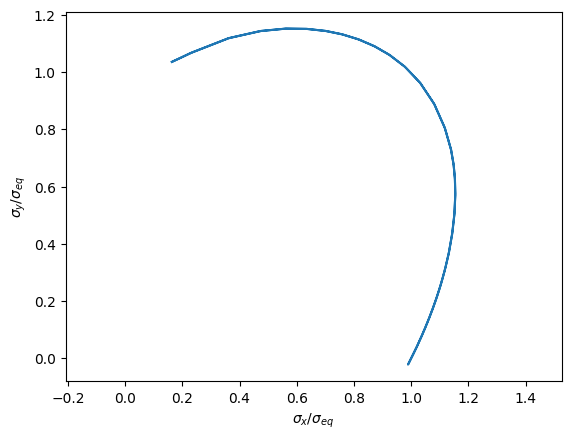

In [12]:
sig_x_path = f"{file}/sigma_x.csv"
sig_y_path = f"{file}/sigma_y.csv"
sig_eq_path = f"{file}/sigma_eq.csv"



df_x = pd.read_csv(sig_x_path, header=1)
df_y = pd.read_csv(sig_y_path, header=1)
df_eq = pd.read_csv(sig_eq_path, header=1)


column_headers_x = list(df_x.columns.values)
column_headers_y = list(df_y.columns.values)
column_headers_eq = list(df_eq.columns.values)





sigma_x = df_x[column_headers_x[1]]
sigma_y = df_y[column_headers_y[1]]
sigma_eq = df_eq[column_headers_eq[1]]

y = sigma_y/sigma_eq
x = sigma_x/sigma_eq


# plt.scatter(x, y)
plt.plot(x, y, "-")

plt.xlabel(r'$\sigma_x/\sigma_{eq}$')

plt.ylabel(r'$\sigma_y/\sigma_{eq}$')
plt.savefig(file+f"/sigma.svg")
plt.axis("equal") 
plt.show()